# TMA4320 V2019 - Programmeringsoppgave, prøveeksamen

I denne oppgaven skal du implementere den klassiske fjerde ordens Runge-Kutta metoden (Kutta 1901) med konstant skrittlengde, og teste den ut på et angitt problem.

Metoden, også oppgitt i formelarket, kan skrives over ett skritt som

\begin{align*}
  F_1 &= f(t_n,y_n) \\
  F_2 &= f(t_n+\frac{h}{2},y_n+\frac{h}{2}F_1) \\
  F_3 &= f(t_n+\frac{h}{2}, y_n + \frac{h}{2} F_2) \\
  F_4 &= f(t_n+h, y_n + h F_3) \\
  y_{n+1} &= y_n + \frac{h}{6}(F_1+2F_2+2F_3+F_4)
\end{align*}

der $h$ er skrittlengden $t_{n+1}-t_n$ som altså holdes konstant for alle $n$.

Vi skal løse et Lotka-Volterra (rovdyr-byttedyr) problem som kan skrives som

\begin{align*}
u' &= u(v-2),& u(0)&=u_0 \\
v' &=  v(1-u), & v(0)&= v_0
\end{align*}

**Oppgave** 

**(a)** Skriv en funksjon Kutta4 med 

Input
* f: En funksjon f(t,y) som definerer differensialligningen. t er en skalar og y et numpy array, se i/o def under **(b)**
* t0: Startverdien for t.
* y0: Startverdien for y y(t0)=y0 (numpy array)
* h: Skrittlengde (konstant for alle skritt)
* nsteps: Antall skritt som skal tas

Output
* T: numpy array av lengde nsteps+1 der [t0,t1,...,t(nsteps)] er lagret
* Y: numpy array i 2d av størrelse (nsteps+1,m) der m er antall komponenter i y.

**(b)** Skriv rutinen f som definerer differensialligningen

Input
* t: skalar (tid)
* y: numpy array som representerer løsning ved tid t

Output
* yd: numpy array som angir den deriverte yd=f(t,y)

**(c)** Skriv kode som finner løsningen av Lotka-Volterra problemet ovenfor med følgende 
5 valg av startverdier ($u_0, v_0$): $(1,1+0.2\cdot \ell),\ \ell=0,1,2,3,4$. Bruk $h=0.02$ og 
nsteps=250 for alle tilfellene. Plott første mot andre komponent av løsningen, alle 5 kurver i samme plott.

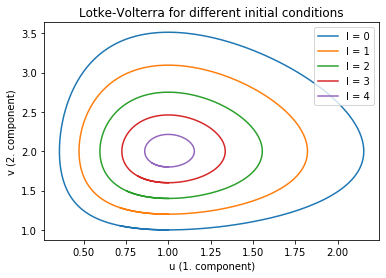

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def kutta4_step(f, t, y, h):
    f1 = f(t, y)
    f2 = f(t+(h/2), y+(h/2)*f1)
    f3 = f(t+(h/2), y+(h/2)*f2)
    f4 = f(t+h, y+h*f3)
    return y + (h/6)*(f1+2*f2+2*f3+f4)
    

def Kutta4(f,t0,y0,h,nsteps):
    m = len(y0)
    Y = np.zeros((nsteps+1,m))
    T = np.zeros(nsteps+1)
    T[0] = t0
    Y[0] = y0
    for i in range(nsteps):
        Y[i+1] = kutta4_step(f, T[i], Y[i], h)
        T[i+1] = T[i] + h
    return T,Y
    
def f(t,y):
    '''Lotka-Volterra problemet'''
    yd = np.array([y[0]*(y[1]-2), y[1]*(1-y[0])])
    return yd
    
    
'''Her setter du opp startverdier, kaller Kutta4 en gang for hver startverdi, 
og plotter resultatene. Husk alle 5 kurver i samme plott'''
h = 0.02
nsteps = 250
t0 = 0
for l in range(5):
    y0 = np.array([1, 1+0.2*l])
    T, Y = Kutta4(f, t0, y0, h, nsteps)
    plt.plot(Y[:,0], Y[:,1], label="l = "+str(l))
plt.legend()
plt.title("Lotke-Volterra for different initial conditions")
plt.xlabel("u (1. component)")
plt.ylabel("v (2. component)")
plt.show()
